# PSF size for the different LSST filters

In [1]:
# Import general python packages
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas
from pandas.testing import assert_frame_equal
from astropy import units as u
from astropy.coordinates import SkyCoord


# Import the Rubin TAP service utilities
from lsst.rsp import get_tap_service, retrieve_query

# Bokeh and holoviews for interactive visualization
import bokeh
from bokeh.io import output_file, output_notebook, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, CDSView, GroupFilter, HoverTool
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
import holoviews as hv

# To ignore some kinds of warnings
import warnings
from astropy.units import UnitsWarning

In [2]:
service = get_tap_service()
assert service is not None
assert service.baseurl == "https://data.lsst.cloud/api/tap"

In [3]:
coord = SkyCoord(ra=62.0*u.degree, dec=-37.0*u.degree, frame='icrs')
radius = 1 * u.deg

query = "SELECT obj.objectId, obj.ra, obj.dec, obj.mag_g, obj.mag_i, obj.mag_r, obj.mag_u, obj.mag_y, obj.mag_z, "\
        "obj.Ixx_pixel, obj.Ixx_pixel_g, obj.Ixx_pixel_i, obj.Ixx_pixel_r, obj.Ixx_pixel_u, "\
        "obj.Ixx_pixel_y, obj.Ixx_pixel_z, obj.IxxPSF_pixel, obj.IxxPSF_pixel_g, obj.IxxPSF_pixel_i, " \
        "obj.IxxPSF_pixel_r, obj.IxxPSF_pixel_u, obj.IxxPSF_pixel_y, obj.IxxPSF_pixel_z, obj.Ixy_pixel, "\
        "obj.Ixy_pixel_g, obj.Ixy_pixel_i, obj.Ixy_pixel_r, obj.Ixy_pixel_u, obj.Ixy_pixel_y, " \
        "obj.Ixy_pixel_z, obj.IxyPSF_pixel, obj.IxyPSF_pixel_g, obj.IxyPSF_pixel_i, " \
        "obj.IxyPSF_pixel_r, obj.IxyPSF_pixel_u, obj.IxyPSF_pixel_y, obj.IxyPSF_pixel_z, " \
        "obj.Iyy_pixel, obj.Iyy_pixel_g, obj.Iyy_pixel_i, obj.Iyy_pixel_r, obj.Iyy_pixel_u, " \
        "obj.Iyy_pixel_y, obj.Iyy_pixel_z, obj.IyyPSF_pixel, obj.IyyPSF_pixel_g, obj.IyyPSF_pixel_i, " \
        "obj.IyyPSF_pixel_r, obj.IyyPSF_pixel_u, obj.IyyPSF_pixel_y, obj.IyyPSF_pixel_z," \
        "obj.tract, obj.patch, " \
        "obj.extendedness, obj.good, obj.clean, " \
        "truth.mag_r as truth_mag_r, truth.match_objectId, "\
        "truth.flux_g, truth.flux_r, truth.flux_i, truth.truth_type, " \
        "truth.match_sep, truth.is_variable " \
        "FROM dp01_dc2_catalogs.object as obj " \
        "JOIN dp01_dc2_catalogs.truth_match as truth " \
        "ON truth.match_objectId = obj.objectId " \
        "WHERE CONTAINS(POINT('ICRS', obj.ra, obj.dec),CIRCLE('ICRS', " \
        + str(coord.ra.value) + ", " + str(coord.dec.value) + ", " \
        + str(radius.value) + " )) = 1 " \
        "AND truth.match_objectid >= 0 "\
        "AND obj.extendedness = 0 "\
        "AND truth.is_good_match = 1"

results = service.search(query).to_table().to_pandas()

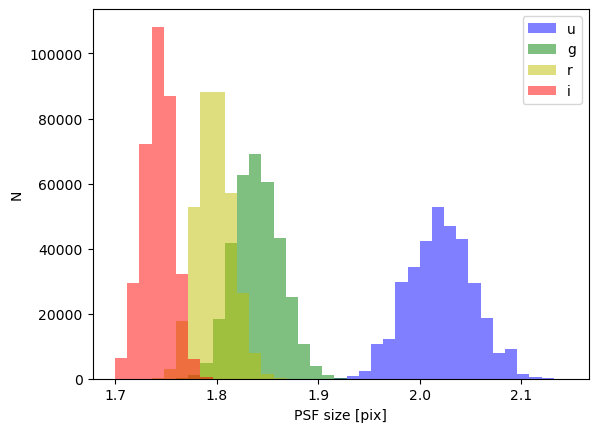

In [4]:
size_u = np.sqrt((results["IxxPSF_pixel_u"] + results["IyyPSF_pixel_u"]) / 2.)
size_g = np.sqrt((results["IxxPSF_pixel_g"] + results["IyyPSF_pixel_g"]) / 2.)
size_r = np.sqrt((results["IxxPSF_pixel_r"] + results["IyyPSF_pixel_r"]) / 2.)
size_i = np.sqrt((results["IxxPSF_pixel_i"] + results["IyyPSF_pixel_i"]) / 2.)
#size_z = np.sqrt((results["IxxPSF_pixel_z"] + results["IyyPSF_pixel_z"]) / 2.)
#size_y = np.sqrt((results["IxxPSF_pixel_y"] + results["IyyPSF_pixel_y"]) / 2.)
bins = np.arange(1.7, 2.15, 0.012)

plt.hist(size_u, bins, alpha=0.5, color = 'b', label='u')
plt.hist(size_g, bins, alpha=0.5, color = 'g', label='g')
plt.hist(size_r, bins, alpha=0.5, color = 'y', label='r')
plt.hist(size_i, bins, alpha=0.5, color = 'r', label='i')

plt.xlabel('PSF size [pix]')
plt.ylabel('N')
plt.legend()

## PSF size as function of RA,DEC

In [4]:
coord = SkyCoord(ra=62.0*u.degree, dec=-37.0*u.degree, frame='icrs')
radius = 0.5 * u.deg

query = "SELECT obj.objectId, obj.ra, obj.dec, obj.mag_g, obj.mag_i, obj.mag_r, obj.mag_u, obj.mag_y, obj.mag_z, "\
        "obj.Ixx_pixel, obj.Ixx_pixel_g, obj.Ixx_pixel_i, obj.Ixx_pixel_r, obj.Ixx_pixel_u, "\
        "obj.Ixx_pixel_y, obj.Ixx_pixel_z, obj.IxxPSF_pixel, obj.IxxPSF_pixel_g, obj.IxxPSF_pixel_i, " \
        "obj.IxxPSF_pixel_r, obj.IxxPSF_pixel_u, obj.IxxPSF_pixel_y, obj.IxxPSF_pixel_z, obj.Ixy_pixel, "\
        "obj.Ixy_pixel_g, obj.Ixy_pixel_i, obj.Ixy_pixel_r, obj.Ixy_pixel_u, obj.Ixy_pixel_y, " \
        "obj.Ixy_pixel_z, obj.IxyPSF_pixel, obj.IxyPSF_pixel_g, obj.IxyPSF_pixel_i, " \
        "obj.IxyPSF_pixel_r, obj.IxyPSF_pixel_u, obj.IxyPSF_pixel_y, obj.IxyPSF_pixel_z, " \
        "obj.Iyy_pixel, obj.Iyy_pixel_g, obj.Iyy_pixel_i, obj.Iyy_pixel_r, obj.Iyy_pixel_u, " \
        "obj.Iyy_pixel_y, obj.Iyy_pixel_z, obj.IyyPSF_pixel, obj.IyyPSF_pixel_g, obj.IyyPSF_pixel_i, " \
        "obj.IyyPSF_pixel_r, obj.IyyPSF_pixel_u, obj.IyyPSF_pixel_y, obj.IyyPSF_pixel_z," \
        "obj.tract, obj.patch, " \
        "obj.extendedness, obj.good, obj.clean, " \
        "truth.mag_r as truth_mag_r, truth.match_objectId, "\
        "truth.flux_g, truth.flux_r, truth.flux_i, truth.truth_type, " \
        "truth.match_sep, truth.is_variable " \
        "FROM dp01_dc2_catalogs.object as obj " \
        "JOIN dp01_dc2_catalogs.truth_match as truth " \
        "ON truth.match_objectId = obj.objectId " \
        "WHERE CONTAINS(POINT('ICRS', obj.ra, obj.dec),CIRCLE('ICRS', " \
        + str(coord.ra.value) + ", " + str(coord.dec.value) + ", " \
        + str(radius.value) + " )) = 1 " \
        "AND truth.match_objectid >= 0 "\
        "AND obj.extendedness = 0 "\
        "AND truth.is_good_match = 1"

results = service.search(query).to_table().to_pandas()

In [5]:
max(results['extendedness'])

0.0

Text(0, 0.5, 'DEC')

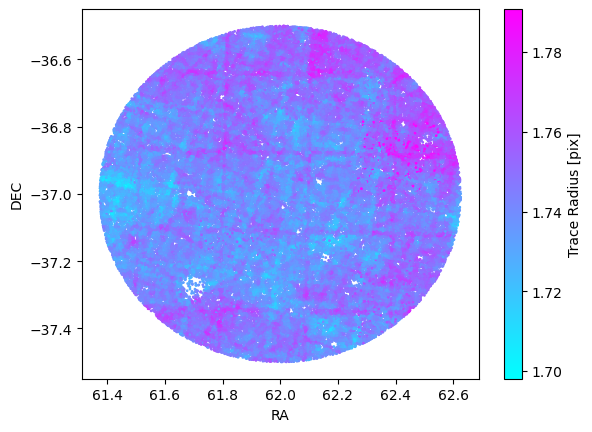

In [22]:
ra = results['ra']
dec = results['dec']
size_i = np.sqrt((results["IxxPSF_pixel_i"] + results["IyyPSF_pixel_i"]) / 2.)

plt.scatter(ra, dec, c=size_i, s=1, cmap='cool')
colorbar = plt.colorbar(label='Trace Radius [pix]')
plt.xlabel('RA')
plt.ylabel('DEC')

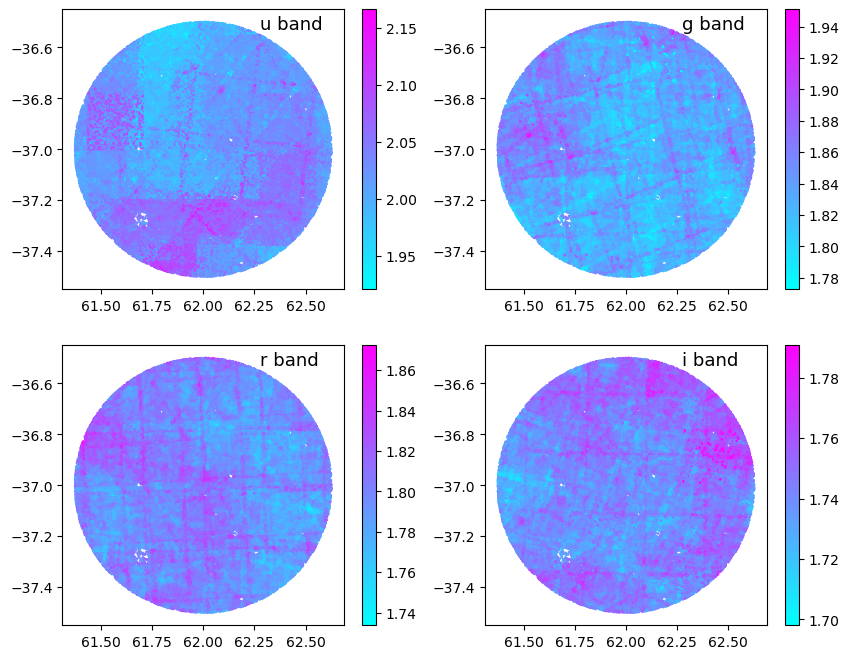

In [26]:
ra = results['ra']
dec = results['dec']

def PSF_size(band):
    return np.sqrt((results["IxxPSF_pixel_" + band] + results["IyyPSF_pixel_" + band]) / 2.)

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for i,b in enumerate("ugri"):
    if i <= 1: j=0
    else: j=1
    sc = ax[j,i%2].scatter(ra, dec, c = PSF_size(b), s = 1, cmap = 'cool')
    plt.colorbar(sc, ax = ax[j,i%2])
    plt.text(0.7, 0.93, b + " band", color = 'k', fontsize=13, transform=ax[j,i%2].transAxes)


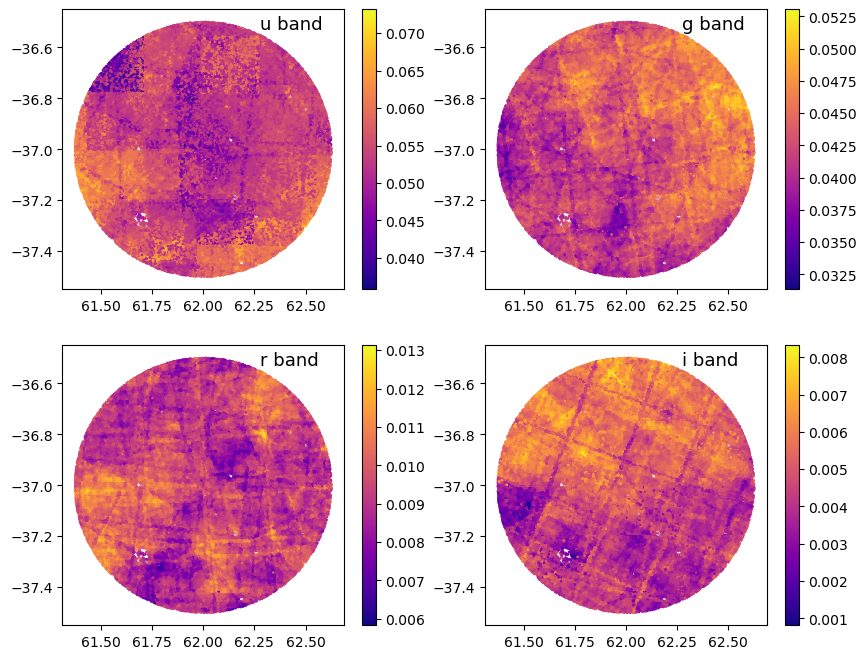

In [24]:
def ellipticity(band):
    i_xx = results["IxxPSF_pixel_" + band]
    i_yy = results["IyyPSF_pixel_" + band]
    i_xy = results["IxyPSF_pixel_" + band]
    e1 = (i_xx - i_yy) / (i_xx + i_yy)
    e2 = (2. * i_xy) / (i_xx + i_yy)
    return np.sqrt(e1**2 + e2**2)

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

for i,b in enumerate("ugri"):
    if i <= 1: j=0
    else: j=1
    sc = ax[j,i%2].scatter(ra, dec, c = ellipticity(b), s = 1, cmap = 'plasma')
    plt.colorbar(sc, ax = ax[j,i%2])
    plt.text(0.7, 0.93, b + " band", color = 'k', fontsize=13, transform=ax[j,i%2].transAxes)
